<h1>Unit06 K-Means clustering on wine data</h1>

<h2>Import libraries</h2>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<h2>Load Data From CSV File</h2>

In [3]:
wine_df = pd.read_csv("data/Unit06 wine.csv")
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<h2>The 13 attributes</h2>
Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline

In [5]:
# Display the shape of the DataFrame
print("Shape of the Wine DataFrame:", wine_df.shape)

Shape of the Wine DataFrame: (178, 14)


In [9]:
# Get rid of "Wine"
X = wine_df.drop(columns=['Wine'])
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
# Create a KMeans instance with 3 clusters and fit the KMeans model to the data
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cbutt\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [17]:
# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
# cluster_centers

labels = kmeans.labels_
labels

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [18]:
# Adding cluster labels to the DataFrame
wine_df['cluster'] = labels

In [19]:
# Plotting the clusters based on two attributes (for simplicity)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [20]:
# Select two attributes for visualization (e.g., first two)
attribute1 = 'Alcohol'
attribute2 = 'Malic.acid'

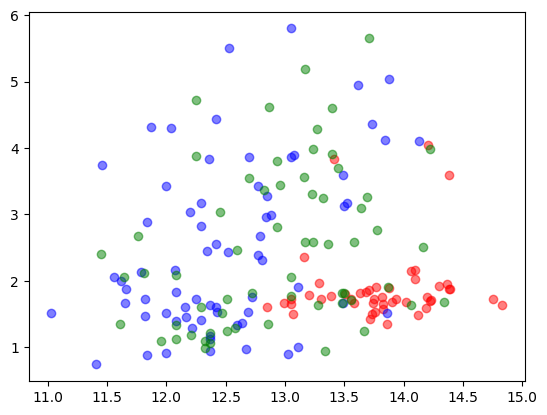

In [21]:
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)


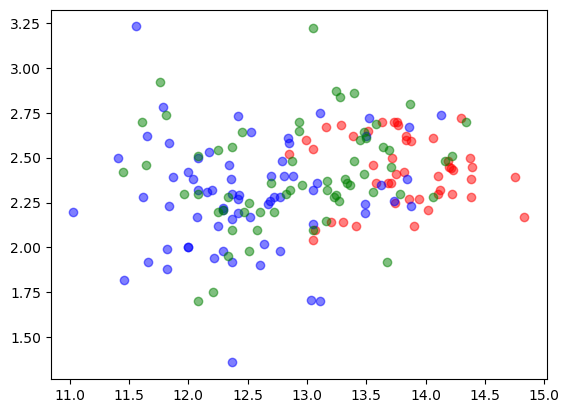

In [22]:
# there's a lot of overlap
# Select two attributes for visualization (e.g., first and third)
attribute1 = 'Alcohol'
attribute2 = 'Ash'
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

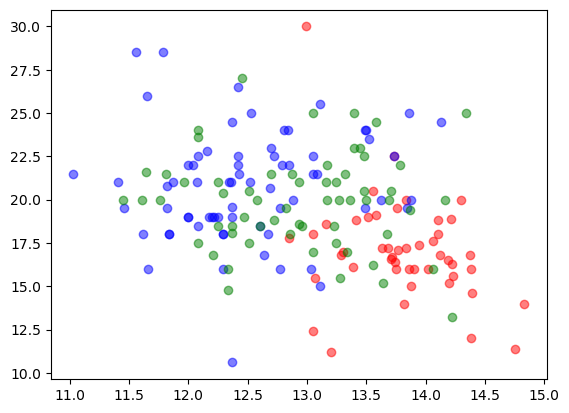

In [23]:
# there's still lots of overlap - it looks like a colour-blindness test
# Select two attributes for visualization (e.g., first and fourth)
attribute1 = 'Alcohol'
attribute2 = 'Acl'   # Alkalinity of ash
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

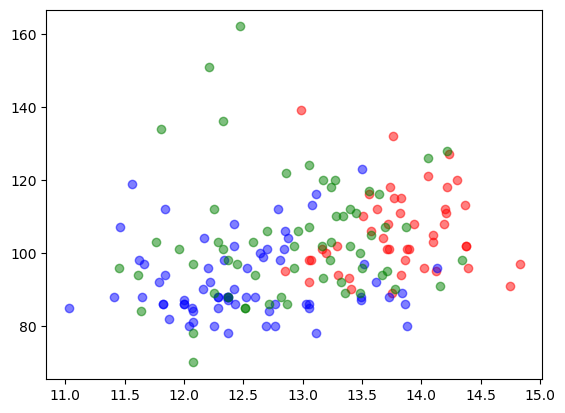

In [24]:
attribute1 = 'Alcohol'
attribute2 = 'Mg'   # Magnesium
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

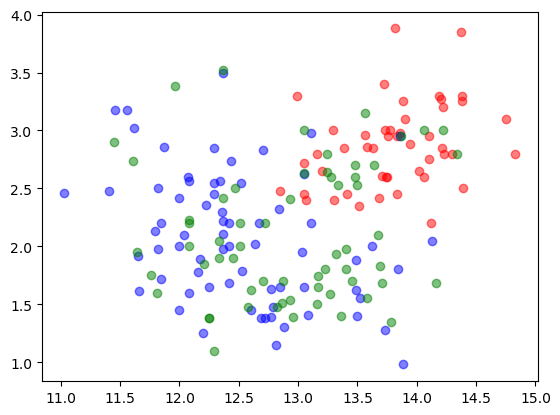

In [25]:
attribute1 = 'Alcohol'
attribute2 = 'Phenols'   # Total phenols
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

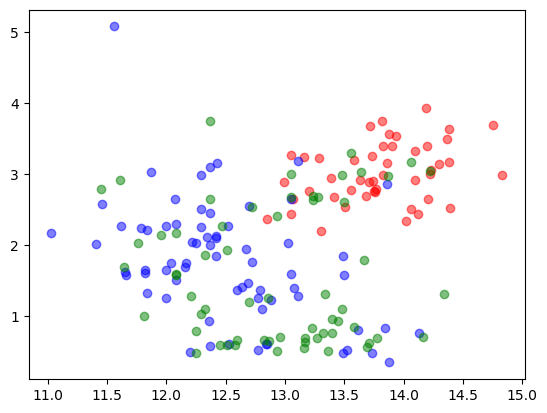

In [26]:
attribute1 = 'Alcohol'
attribute2 = 'Flavanoids'   # Flavanoids
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

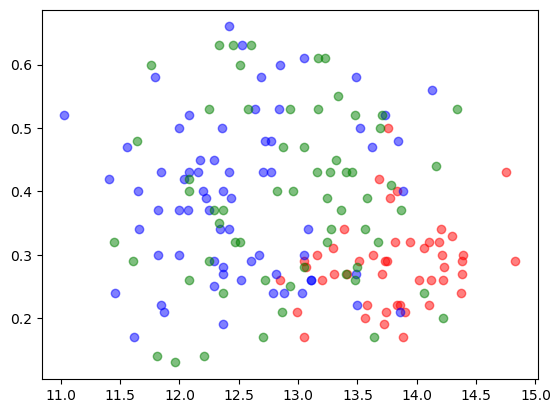

In [27]:

attribute1 = 'Alcohol'
attribute2 = 'Nonflavanoid.phenols'   # Nonflavanoid phenols
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

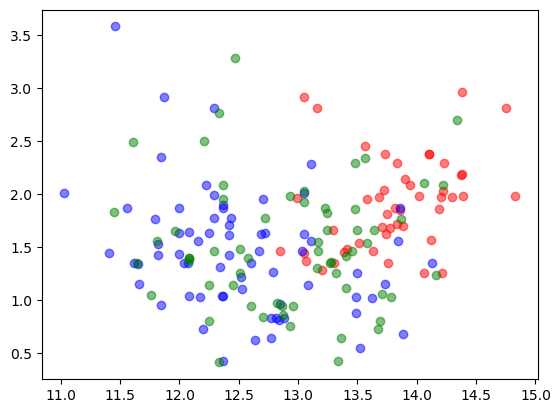

In [28]:

attribute1 = 'Alcohol'
attribute2 = 'Proanth'   # Proanthocyanins
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

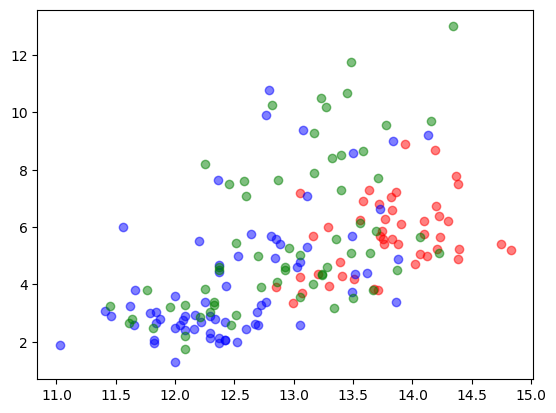

In [29]:


attribute1 = 'Alcohol'
attribute2 = 'Color.int'   # Colour intensity
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

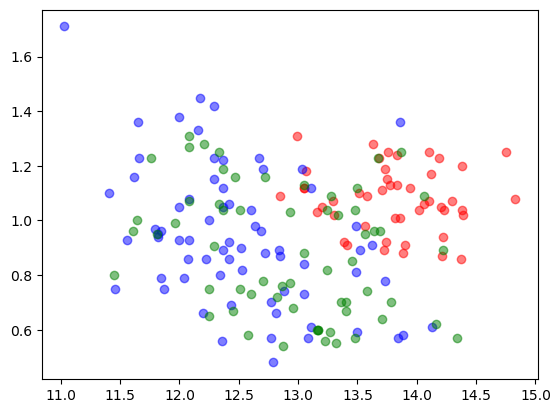

In [30]:


attribute1 = 'Alcohol'
attribute2 = 'Hue'   # Hue
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

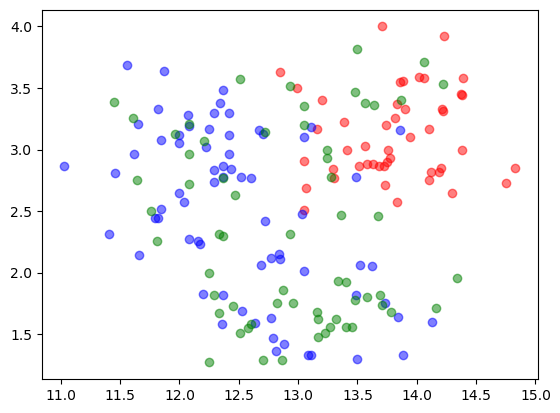

In [31]:


attribute1 = 'Alcohol'
attribute2 = 'OD'   # OD280/OD315 of diluted wines
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

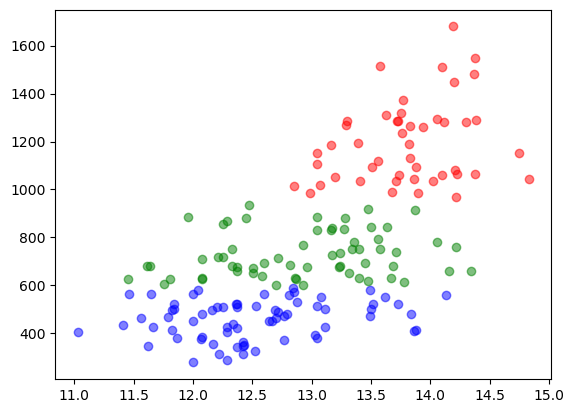

In [32]:


attribute1 = 'Alcohol'
attribute2 = 'Proline'   # Proline
plt.scatter(wine_df[wine_df['cluster'] == 0][attribute1], wine_df[wine_df['cluster'] == 0][attribute2], label='Cluster 0', c='red', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 1][attribute1], wine_df[wine_df['cluster'] == 1][attribute2], label='Cluster 1', c='blue', alpha=0.5)
plt.scatter(wine_df[wine_df['cluster'] == 2][attribute1], wine_df[wine_df['cluster'] == 2][attribute2], label='Cluster 2', c='green', alpha=0.5)

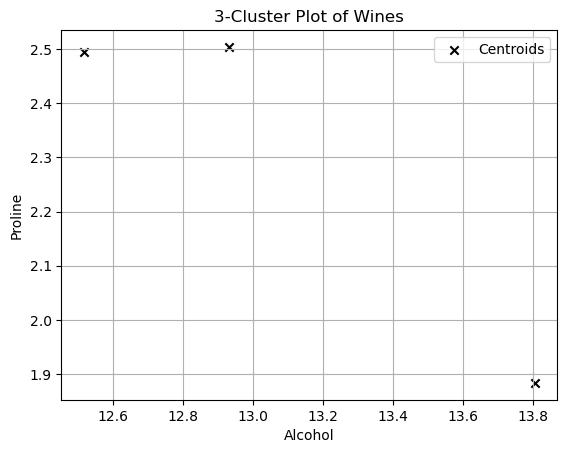

In [33]:
# They put the best one in the last column!!!
# let's see the centroids of the Alcohol / Proline clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Centroids')

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.title('3-Cluster Plot of Wines')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# what the hell is this?  GPT strikes again!